In [19]:
import os
import warnings
import random
import numpy as np
import matplotlib.pyplot as plt

# Import libraries
from keras.layers import *
from keras.models import *
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras

warnings.filterwarnings('ignore')

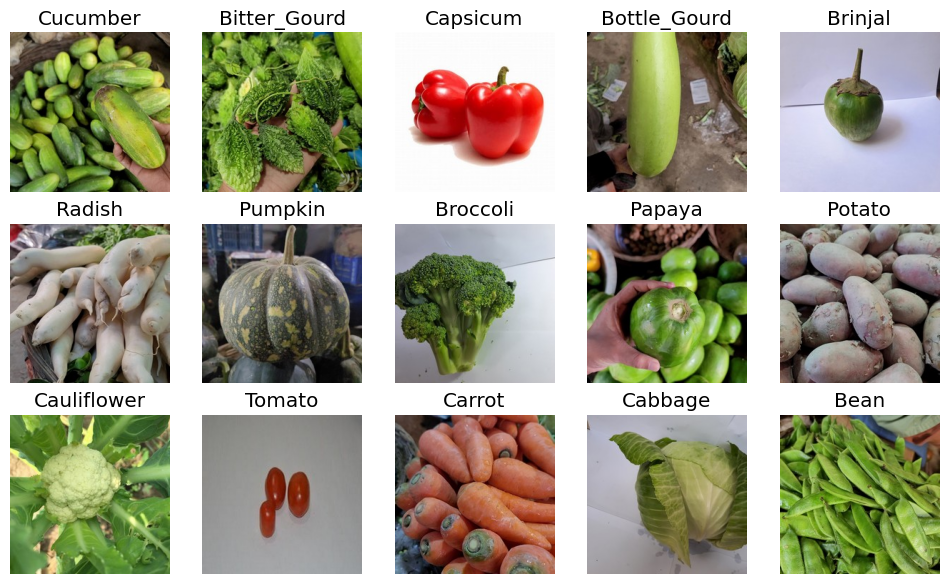

In [33]:
# Let's plot a few images
train_path = "data/vegetable-image-dataset/train"
validation_path = "data/vegetable-image-dataset/validation"
test_path = "data/vegetable-image-dataset/test"

image_categories = os.listdir('data/vegetable-image-dataset/train')

random_number_generator = [x for x in range(7)]
random_number = random.choice(random_number_generator)

def plot_images(image_categories):
    
    random.shuffle(image_categories)
    
    # Create a figure
    plt.figure(figsize=(12, 12))
    for i, cat in enumerate(image_categories):
        
        # Load images for the ith category
        image_path = train_path + '/' + cat
        images_in_folder = os.listdir(image_path)
        
        first_image_of_folder = images_in_folder[random_number]
        first_image_path = image_path + '/' + first_image_of_folder
        img = image.load_img(first_image_path)
        img_arr = image.img_to_array(img)/255.0
        
        # Create Subplot and plot the images
        plt.subplot(5, 5, i+1)
        plt.imshow(img_arr)
        plt.title(cat)
        plt.axis('off')
        
    plt.show()

# Call the function
plot_images(image_categories)

In [34]:
# Creating Image Data Generator for train, validation and test set

# 1. Train Set
train_gen = ImageDataGenerator(rescale = 1.0/255.0) # Normalise the data
train_image_generator = train_gen.flow_from_directory(
                                            train_path,
                                            target_size=(150, 150),
                                            batch_size=32,
                                            class_mode='categorical')

# 2. Validation Set
val_gen = ImageDataGenerator(rescale = 1.0/255.0) # Normalise the data
val_image_generator = train_gen.flow_from_directory(
                                            validation_path,
                                            target_size=(150, 150),
                                            batch_size=32,
                                            class_mode='categorical')

# 3. Test Set
test_gen = ImageDataGenerator(rescale = 1.0/255.0) # Normalise the data
test_image_generator = train_gen.flow_from_directory(
                                            test_path,
                                            target_size=(150, 150),
                                            batch_size=32,
                                            class_mode='categorical')

Found 15000 images belonging to 15 classes.
Found 3000 images belonging to 15 classes.
Found 3000 images belonging to 15 classes.


In [51]:
# Build a custom sequential CNN model

model = Sequential() # model object

# Add Layers
model.add(Conv2D(filters=8, kernel_size=3, strides=1, padding='same', activation='relu', input_shape=[150, 150, 3]))
model.add(MaxPooling2D(2, ))
model.add(Conv2D(filters=16, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(MaxPooling2D(2))

# Flatten the feature map
model.add(Flatten())

# Add the fully connected layers
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(128, activation='relu'))
model.add(Dense(15, activation='softmax'))

# print the model summary
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 150, 150, 8)       224       
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 75, 75, 8)         0         
 ng2D)                                                           
                                                                 
 conv2d_17 (Conv2D)          (None, 75, 75, 16)        1168      
                                                                 
 max_pooling2d_17 (MaxPooli  (None, 37, 37, 16)        0         
 ng2D)                                                           
                                                                 
 flatten_8 (Flatten)         (None, 21904)             0         
                                                                 
 dense_24 (Dense)            (None, 128)              

In [53]:
# Compile and fit the model
early_stopping = keras.callbacks.EarlyStopping(patience=5) # Set up callbacks
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
hist = model.fit(train_image_generator, 
                 epochs=10, 
                 verbose=1, 
                 validation_data=val_image_generator, 
                 steps_per_epoch = 15000//32, 
                 validation_steps = 3000//32, 
                 callbacks=early_stopping)

Epoch 1/10
468/468 [==============================] - 31s 60ms/step - loss: 0.3552 - accuracy: 0.8797 - val_loss: 0.2907 - val_accuracy: 0.9056
Epoch 2/10
468/468 [==============================] - 25s 53ms/step - loss: 0.3001 - accuracy: 0.8963 - val_loss: 0.2407 - val_accuracy: 0.9247
Epoch 3/10
468/468 [==============================] - 33s 71ms/step - loss: 0.2612 - accuracy: 0.9109 - val_loss: 0.2868 - val_accuracy: 0.9076
Epoch 4/10
468/468 [==============================] - 27s 59ms/step - loss: 0.2358 - accuracy: 0.9180 - val_loss: 0.3052 - val_accuracy: 0.9120
Epoch 5/10
468/468 [==============================] - 29s 62ms/step - loss: 0.2005 - accuracy: 0.9319 - val_loss: 0.2944 - val_accuracy: 0.9126
Epoch 6/10
468/468 [==============================] - 27s 58ms/step - loss: 0.1859 - accuracy: 0.9362 - val_loss: 0.2996 - val_accuracy: 0.9130
Epoch 7/10
468/468 [==============================] - 25s 53ms/step - loss: 0.1748 - accuracy: 0.9410 - val_loss: 0.2930 - val_accuracy:

In [37]:
# Predict the accuracy for the test set
model.evaluate(test_image_generator)

94/94 [==============================] - 5s 54ms/step - loss: 0.8590 - accuracy: 0.7177


[0.8589539527893066, 0.7176666855812073]

1/1 [==============================] - 0s 19ms/step


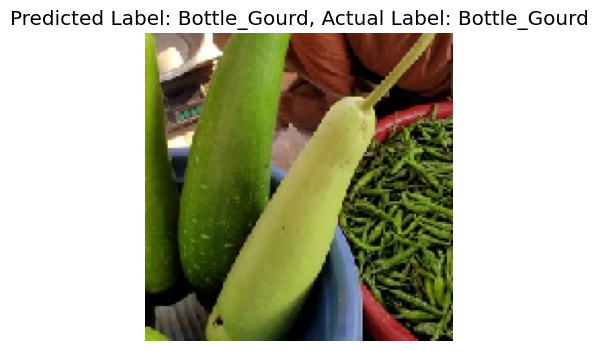

In [70]:
# Testing the Model
# test_image_path = 'data/vegetable-image-dataset/test/Capsicum/1001.jpg'

test_image_cat = os.listdir('data/vegetable-image-dataset/test')
random_test_image_cat = random.choice(test_image_cat)
test_image_file = os.listdir('data/vegetable-image-dataset/test/'+random_test_image_cat)
random_number_image_cat = random.choice(test_image_file)

test_image_path = 'data/vegetable-image-dataset/test/'+ random_test_image_cat +'/'+ random_number_image_cat

# Print the class encodings done by the generators
class_map = dict([(v, k) for k, v in train_image_generator.class_indices.items()])

def generate_predictions(test_image_path, actual_label):
    
    # 1. Load and preprocess the image
    test_img = image.load_img(test_image_path, target_size=(150, 150))
    test_img_arr = image.img_to_array(test_img)/255.0
    test_img_input = test_img_arr.reshape((1, test_img_arr.shape[0], test_img_arr.shape[1], test_img_arr.shape[2]))

    # 2. Make Predictions
    predicted_label = np.argmax(model.predict(test_img_input))
    predicted_vegetable = class_map[predicted_label]
    plt.figure(figsize=(4, 4))
    plt.imshow(test_img_arr)
    plt.title("Predicted Label: {}, Actual Label: {}".format(predicted_vegetable, actual_label))
    plt.grid()
    plt.axis('off')
    plt.show()

# call the function
generate_predictions(test_image_path, actual_label=random_test_image_cat)